# Products and Competitors Producst

In [28]:
import pandas as pd
import numpy as np
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

%matplotlib inline

## Read data and missing value visualization

### products 
information about Wayfair products sold online

Field | Type | Description
--- | --- | ---
website_name | STRING |	Name of Wayfair vendor website
product_id | INTEGER | Unique ID for product in question
product_name | STRING | Name of product in question
category_name | STRING | Name of category given to product
description	STRING | Product | description
manufacturer_name | STRING | Name of the manufacturer of the product
weight | FLOAT | The weight of the product in pounds
dimension_1 | FLOAT | First product dimension in inches
dimension_2 | FLOAT | Second product dimension in inches
dimension_3 | FLOAT | Third product dimension in inches
num_reviews | FLOAT | Number of reviews on the product
onsite_price | FLOAT | The price Wayfair listed for the product on their website
on_promotion | INTEGER | 1 if the product is on promotion else 0


In [2]:
df_products = pd.read_csv('data/products.csv')
print(df_products.shape)
df_products.head()

(498673, 13)


,website_name,product_id,product_name,category_name,description,manufacturer_name,weight,dimension_1,dimension_2,dimension_3,num_reviews,onsite_price,on_promotion
0,Joss US,2.790000e+18,Westgate Upholstered Panel Bed,Beds,The 1882 upholstered bed is sure to appeal to ...,Pulaski Furniture,116.0,59.25,87.50,68.75,7.0,409.99,0
1,Joss US,8.190000e+18,3 Piece Leah Bowl Set,"Boxes, Bins, Baskets, & Buckets",Stack green apples on the breakfast bar or dis...,Three Hands Co.,30.8,23.00,28.35,14.17,0.0,89.99,1
2,Joss US,7.240000e+18,Butter Cups/Ranunculus Sunshine Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,16.00,3.00,4.00,0.0,16.99,0
3,Joss US,4.110000e+18,Freesias Double Blooming Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,24.00,2.00,2.00,2.0,9.99,0
4,Joss US,7.670000e+18,Grand Freesia/Ranunculus Blend Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,36.00,3.00,2.00,2.0,9.99,0


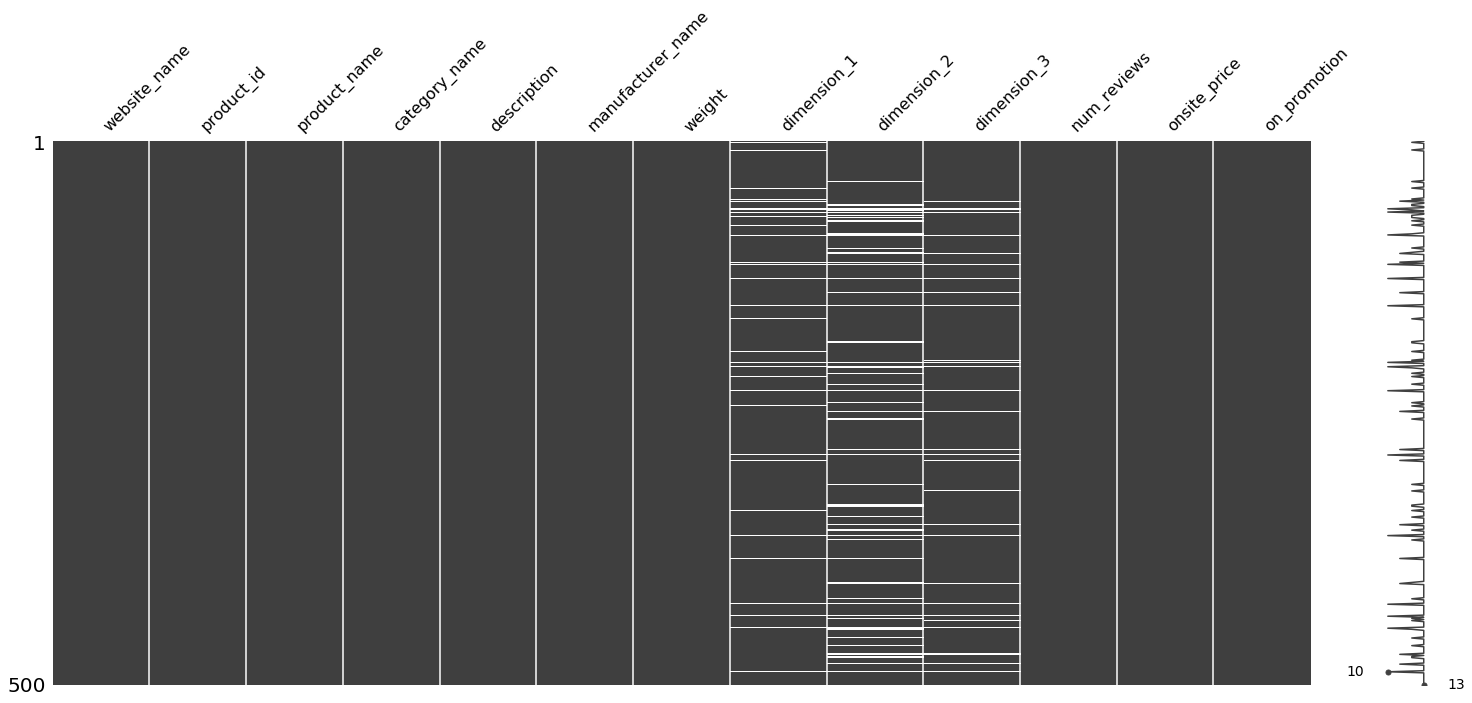

In [31]:
msno.matrix(df_products.sample(500))

### comp_products
Information about products of Wayfair’s competitors that are sold online. 

Field | Type  | Description
---| --- | ---
comp_website_name | STRING | Name of competitor website
comp_product_id | INTEGER | Unique ID for each competitor product
comp_product_name | STRING | Name of the product
category_name | STRING | How Wayfair categorizes this product
comp_description | STRING | Product description
comp_price | FLOAT | The price listed on the competitor’s website


In [3]:
df_comp_products = pd.read_csv('data/comp_products.csv')
print(df_comp_products.shape)
df_comp_products.head()

(1234567, 6)


,comp_website_name,comp_product_id,comp_product_name,category_name,comp_description,comp_price
0,amazon,6597043735844019455,"Trademark Art Kathie McCurdy Colors of Green, ...",Wall Art,"Artist: Kathie McCurdy, Subject: Floral Style:...",71.99
1,amazon,6114697460212133124,"Pfister Raincan Showerhead, Polished Chrome",Shower Heads,"Rain spray provides more coverage and a soft, ...",21.00
2,amazon,743431437000632207,"Alno A7066-BRZ Spa 1 Modern Tissue Holder, Bro...",Toilet Paper Holders,Made by Alno Upc - 785584020087 Vendor Item Nu...,42.71
3,overstock,3528449255436755526,Premier Copper Products LO19RRDB Widespread Fa...,Bathroom Sinks,ITEM#: 15394278 ...,475.00
4,amazon,7102979767482509121,"Royal Designs Twisted Pleat Basic Lamp Shade, ...",Lighting Shades,Shade Dimensions: 6 x 12 x 9 (Top x Bottom x H...,64.95


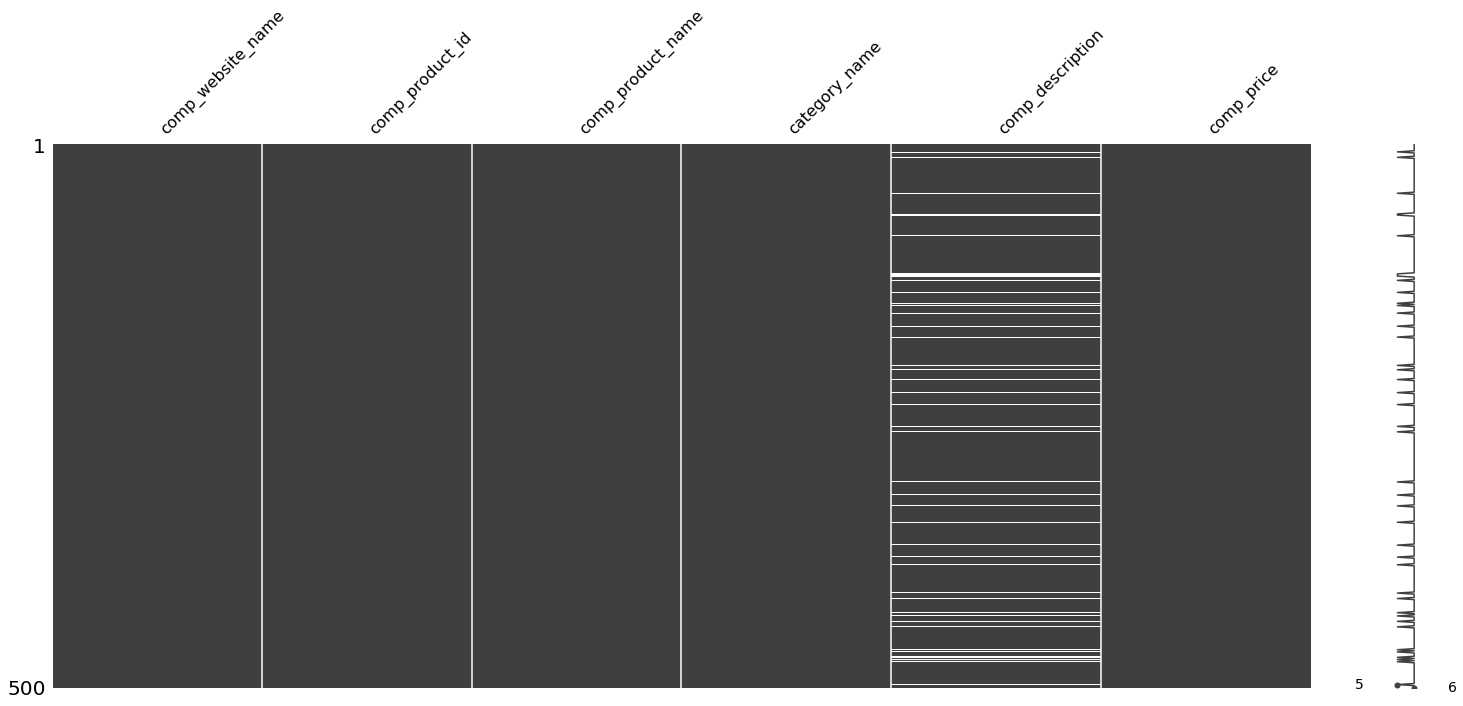

In [33]:
msno.matrix(df_comp_products.sample(500))

## Competitor website name

Combine the competitor webiste name, because the original website name is chaotic, need to combine the same company.

In [20]:
df_comp_products.comp_website_name.value_counts()

amazon              698443
amazonca            129242
overstock           112117
build                99194
amazonde             64051
amazonuk             35550
Lowes                15534
Walmart              13581
walmart              11061
Worldstores           9796
staples               8419
Amazon                5933
worldstores           5753
amazonCA              5336
Hayneedle             4820
target                3390
houzzUS               2752
home24                2622
Jet                   1254
amazonDE              1131
hayneedle             1047
amazonUK               830
lowes                  715
BestBuyCA              407
Amazonuk               356
Overstock              268
otto                   257
Build                  250
Staples                187
HouzzUS                 88
Amazonde                81
houzzus                 68
ajmadison               12
AmazonUK                10
atgstores                9
bedbathandbeyond         1
AmazonDE                 1
e

In [63]:
len(df_comp_products.comp_website_name.values)

1234567

In [21]:
df_products.website_name.value_counts()

Wayfair US    498662
Joss US           11
Name: website_name, dtype: int64

In [22]:
df_products.category_name.value_counts()

Wall Art                              62267
Area Rugs                             28670
Accent Pillows                        19367
Decorative Objects                     7864
Table Lamps                            6895
Pendant Lights                         6447
Wall Décor                             6120
Wall Stickers                          5501
Wall & Accent Mirrors                  5257
End Tables                             5162
Garden Statues & Outdoor Accents       5098
Bedding Sets                           4889
Cabinet and Drawer Pulls               4675
Bar Stools                             4577
Mats                                   4325
Shower Curtains                        4035
Dining Chairs                          3842
Accent Chairs                          3664
Chandeliers                            3637
Floor & Wall Tile                      3465
Vases, Urns, Jars, & Bottles           3420
Curtains & Drapes                      3290
Wallpaper                       

In [15]:
df_comp_products.category_name.value_counts()

Area Rugs                                          123022
Wall Art                                            80211
Pendant Lights                                      38317
Accent Pillows                                      25053
Wall Sconces                                        21531
Flush Mount Lighting                                19616
Chandeliers                                         19141
Fixture Parts And Components                        14112
Vanity Lighting                                     14062
Wall Stickers                                       13549
Outdoor Flush Mounts & Wall Lights                  13091
Table Lamps                                         12885
Cabinet and Drawer Pulls                            10406
Lighting Accessories                                 9820
Bar Stools                                           9365
Mats                                                 8358
Wall & Accent Mirrors                                8294
Bathroom Sink 

In [13]:
categories = set(df_products.category_name.values).intersection(set(df_comp_products.category_name.values))
len(categories)

901

In [26]:
df_products = df_products[df_products.category_name.isin(categories)]
df_comp_products = df_comp_products[df_comp_products.category_name.isin(categories)]

(497275, 13)

In [54]:
df_comp_products.groupby(['comp_website_name','category_name']).mean().iloc[:,1].unstack()

category_name,ATV and UTV Accessories,Ab Exercisers,Abrasives,Accent Chairs,Accent Chests / Cabinets,Accent Furniture - Hallway Sets - EU ONLY,Accent Pillows,Accent Stools,Accent Tiles,Accessories,...,Woks,Wood Care Products,Wood Chips & Chunks,Wood Pellet Grills,Workbenches,Wound Care,Wreaths,Wrenches,Yoga & Pilates,iPad and eReader Cases
comp_website_name,,,,,,,,,,,,,,,,,,,,,
Amazon,NaN,NaN,23.848684,393.380000,142.500000,NaN,41.271912,31.910000,862.610000,NaN,...,NaN,NaN,NaN,NaN,NaN,261.030000,NaN,62.927500,20.165000,NaN
AmazonDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmazonUK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazonde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazonuk,NaN,NaN,NaN,NaN,NaN,NaN,23.351000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BestBuyCA,NaN,NaN,NaN,NaN,112.480000,NaN,69.990000,79.990000,NaN,NaN,...,61.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Build,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.990000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,141.230000,NaN,NaN,NaN
Hayneedle,187.000000,NaN,NaN,489.020556,716.630000,NaN,67.314615,142.425000,NaN,NaN,...,69.990000,NaN,NaN,NaN,341.990000,NaN,77.852222,NaN,23.732222,NaN
HouzzUS,NaN,NaN,NaN,877.400000,NaN,NaN,NaN,179.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
